In [1]:
from keras.models import load_model
from keras.utils import to_categorical

In [2]:
import numpy as np
import json
import pathlib
import random
import matplotlib.pyplot as plt
import cv2

In [3]:
subset_paths = {
  'train': pathlib.Path('./dataset_full/train'),
  'val': pathlib.Path('./dataset_full/val'),
  'test': pathlib.Path('./dataset_full/test')
}

HEIGHT = 224
WIDTH = 224
N_FRAMES = 20
num_classes = 64

In [4]:
def groupFrames(video_path, n_frames = N_FRAMES, frame_step = 15):
  """
    Creates frames from each video file present for each category.

    Args:
      video_path: File path to the video.
      n_frames: Number of frames to be created per video file.
      output_size: Pixel size of the output frame image.

    Return:
      An NumPy array of frames in the shape of (n_frames, height, width, channels).
  """
  # Read each video frame by frame
  result = []
  encoded_string = video_path.encode('latin-1')
  video_path = encoded_string.decode("utf-8")
  src = cv2.VideoCapture(video_path)  
  video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)
  print(f'Video url: {video_path}, video_length:{video_length}')
  need_length = 1 + (n_frames - 1) * frame_step
  if need_length > video_length:
    start = 0
  else:
    max_start = video_length - need_length
    start = random.randint(0, max_start + 1)
  src.set(cv2.CAP_PROP_POS_FRAMES, start)
  # ret is a boolean indicating whether read was successful, frame is the image itself
  ret, frame = src.read()
  if ret: 
      frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
      frame = np.expand_dims(frame, axis=-1) 
      result.append(frame/255)
  for _ in range(n_frames - 1):
    for _ in range(frame_step):
      ret, frame = src.read()
    if ret:   
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        frame = np.expand_dims(frame, axis=-1) 
        result.append(frame/255)
    else:
      result.append(np.zeros_like(result[0]))
  src.release()
  cv2.destroyAllWindows()
  result = np.array(result)
  #print('SHAPE RESULT',result.shape)
  return result

In [5]:
def find_id(labels,name):
   return list(filter(lambda x: x['name'] == name,labels))[0]

def get_files_and_class_names(path):
    video_paths = list(path.glob('*/*.avi'))
    classes = [p.parent.name for p in video_paths]
    f = open('./dataset.json')
    labels = json.load(f)
    classes = np.array(list(map(lambda x: int(find_id(labels,x)['id'])-1,classes)))
    encoded_labels = to_categorical(classes)
    videos = np.array([groupFrames(str(p)) for p in video_paths],dtype='float16')
    return videos, classes

In [60]:
x_test, y_test = get_files_and_class_names(subset_paths['test'])

Video url: dataset_full\test\Aceptar\050_001_004.avi, video_length:152.0
Video url: dataset_full\test\Aceptar\050_001_005.avi, video_length:182.0
Video url: dataset_full\test\Aceptar\050_003_002.avi, video_length:152.0
Video url: dataset_full\test\Aceptar\050_004_001.avi, video_length:122.0
Video url: dataset_full\test\Aceptar\050_004_005.avi, video_length:92.0
Video url: dataset_full\test\Aceptar\050_005_002.avi, video_length:152.0
Video url: dataset_full\test\Aceptar\050_005_003.avi, video_length:152.0
Video url: dataset_full\test\Aceptar\050_006_003.avi, video_length:122.0
Video url: dataset_full\test\Aceptar\050_007_005.avi, video_length:122.0
Video url: dataset_full\test\Aceptar\050_009_002.avi, video_length:152.0
Video url: dataset_full\test\Agua\022_001_005.avi, video_length:148.0
Video url: dataset_full\test\Agua\022_002_003.avi, video_length:88.0
Video url: dataset_full\test\Agua\022_003_001.avi, video_length:118.0
Video url: dataset_full\test\Agua\022_003_003.avi, video_lengt

Video url: dataset_full\test\Atrapar\055_006_002.avi, video_length:92.0
Video url: dataset_full\test\Atrapar\055_006_004.avi, video_length:92.0
Video url: dataset_full\test\Atrapar\055_008_001.avi, video_length:92.0
Video url: dataset_full\test\Atrapar\055_008_005.avi, video_length:122.0
Video url: dataset_full\test\Atrapar\055_009_002.avi, video_length:122.0
Video url: dataset_full\test\Atrapar\055_010_003.avi, video_length:92.0
Video url: dataset_full\test\Atrapar\055_010_005.avi, video_length:122.0
Video url: dataset_full\test\Ayuda\056_001_005.avi, video_length:122.0
Video url: dataset_full\test\Ayuda\056_002_003.avi, video_length:122.0
Video url: dataset_full\test\Ayuda\056_002_005.avi, video_length:122.0
Video url: dataset_full\test\Ayuda\056_005_001.avi, video_length:122.0
Video url: dataset_full\test\Ayuda\056_005_005.avi, video_length:152.0
Video url: dataset_full\test\Ayuda\056_006_002.avi, video_length:122.0
Video url: dataset_full\test\Ayuda\056_006_003.avi, video_length:12

Video url: dataset_full\test\Colores\007_010_005.avi, video_length:88.0
Video url: dataset_full\test\Comprar\059_002_003.avi, video_length:92.0
Video url: dataset_full\test\Comprar\059_002_004.avi, video_length:122.0
Video url: dataset_full\test\Comprar\059_003_002.avi, video_length:122.0
Video url: dataset_full\test\Comprar\059_003_003.avi, video_length:122.0
Video url: dataset_full\test\Comprar\059_003_005.avi, video_length:92.0
Video url: dataset_full\test\Comprar\059_004_004.avi, video_length:92.0
Video url: dataset_full\test\Comprar\059_004_005.avi, video_length:122.0
Video url: dataset_full\test\Comprar\059_005_001.avi, video_length:122.0
Video url: dataset_full\test\Comprar\059_008_002.avi, video_length:92.0
Video url: dataset_full\test\Comprar\059_009_001.avi, video_length:122.0
Video url: dataset_full\test\Copiar\060_001_005.avi, video_length:152.0
Video url: dataset_full\test\Copiar\060_002_002.avi, video_length:122.0
Video url: dataset_full\test\Copiar\060_006_004.avi, video

Video url: dataset_full\test\Espaguetis\048_004_005.avi, video_length:152.0
Video url: dataset_full\test\Espaguetis\048_005_003.avi, video_length:122.0
Video url: dataset_full\test\Espaguetis\048_007_005.avi, video_length:152.0
Video url: dataset_full\test\Espaguetis\048_009_005.avi, video_length:152.0
Video url: dataset_full\test\Espaguetis\048_010_004.avi, video_length:152.0
Video url: dataset_full\test\Foto\032_001_005.avi, video_length:122.0
Video url: dataset_full\test\Foto\032_002_003.avi, video_length:122.0
Video url: dataset_full\test\Foto\032_006_002.avi, video_length:122.0
Video url: dataset_full\test\Foto\032_007_004.avi, video_length:152.0
Video url: dataset_full\test\Foto\032_008_001.avi, video_length:152.0
Video url: dataset_full\test\Foto\032_008_003.avi, video_length:152.0
Video url: dataset_full\test\Foto\032_008_004.avi, video_length:152.0
Video url: dataset_full\test\Foto\032_008_005.avi, video_length:122.0
Video url: dataset_full\test\Foto\032_009_001.avi, video_len

Video url: dataset_full\test\Moneda\035_010_001.avi, video_length:122.0
Video url: dataset_full\test\Mujer\009_001_002.avi, video_length:118.0
Video url: dataset_full\test\Mujer\009_001_003.avi, video_length:118.0
Video url: dataset_full\test\Mujer\009_002_002.avi, video_length:118.0
Video url: dataset_full\test\Mujer\009_002_004.avi, video_length:148.0
Video url: dataset_full\test\Mujer\009_003_001.avi, video_length:118.0
Video url: dataset_full\test\Mujer\009_004_005.avi, video_length:118.0
Video url: dataset_full\test\Mujer\009_006_001.avi, video_length:118.0
Video url: dataset_full\test\Mujer\009_008_005.avi, video_length:118.0
Video url: dataset_full\test\Mujer\009_009_001.avi, video_length:178.0
Video url: dataset_full\test\Mujer\009_009_003.avi, video_length:118.0
Video url: dataset_full\test\Música\036_001_004.avi, video_length:122.0
Video url: dataset_full\test\Música\036_001_005.avi, video_length:152.0
Video url: dataset_full\test\Música\036_003_004.avi, video_length:152.0
Vi

Video url: dataset_full\test\Rosa\008_008_004.avi, video_length:118.0
Video url: dataset_full\test\Rosa\008_009_004.avi, video_length:88.0
Video url: dataset_full\test\Rosa\008_010_001.avi, video_length:88.0
Video url: dataset_full\test\Rosa\008_010_005.avi, video_length:118.0
Video url: dataset_full\test\Skimmer\018_001_002.avi, video_length:118.0
Video url: dataset_full\test\Skimmer\018_001_005.avi, video_length:118.0
Video url: dataset_full\test\Skimmer\018_003_001.avi, video_length:118.0
Video url: dataset_full\test\Skimmer\018_003_002.avi, video_length:148.0
Video url: dataset_full\test\Skimmer\018_004_001.avi, video_length:118.0
Video url: dataset_full\test\Skimmer\018_006_004.avi, video_length:118.0
Video url: dataset_full\test\Skimmer\018_006_005.avi, video_length:118.0
Video url: dataset_full\test\Skimmer\018_007_003.avi, video_length:148.0
Video url: dataset_full\test\Skimmer\018_010_001.avi, video_length:118.0
Video url: dataset_full\test\Skimmer\018_010_004.avi, video_lengt

In [61]:
x_test.shape

(640, 20, 224, 224, 1)

In [6]:
model = load_model('modelFullVids')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 20, 224, 224, 16   160       
 ributed)                    )                                   
                                                                 
 time_distributed_1 (TimeDi  (None, 20, 56, 56, 16)    0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 20, 56, 56, 16)    0         
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 20, 56, 56, 32)    4640      
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 20, 14, 14, 32)    0

In [192]:
model_evaluation_history = model.evaluate(x_test,y_test)

20/20 [==============================] - 204s 10s/step - loss: 0.4649 - accuracy: 0.9234


In [193]:
print(model_evaluation_history)

[0.46493715047836304, 0.9234374761581421]


## Confusion matrix

In [195]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

In [65]:
#Predict
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis = 1)

20/20 [==============================] - 176s 9s/step


<Axes: >

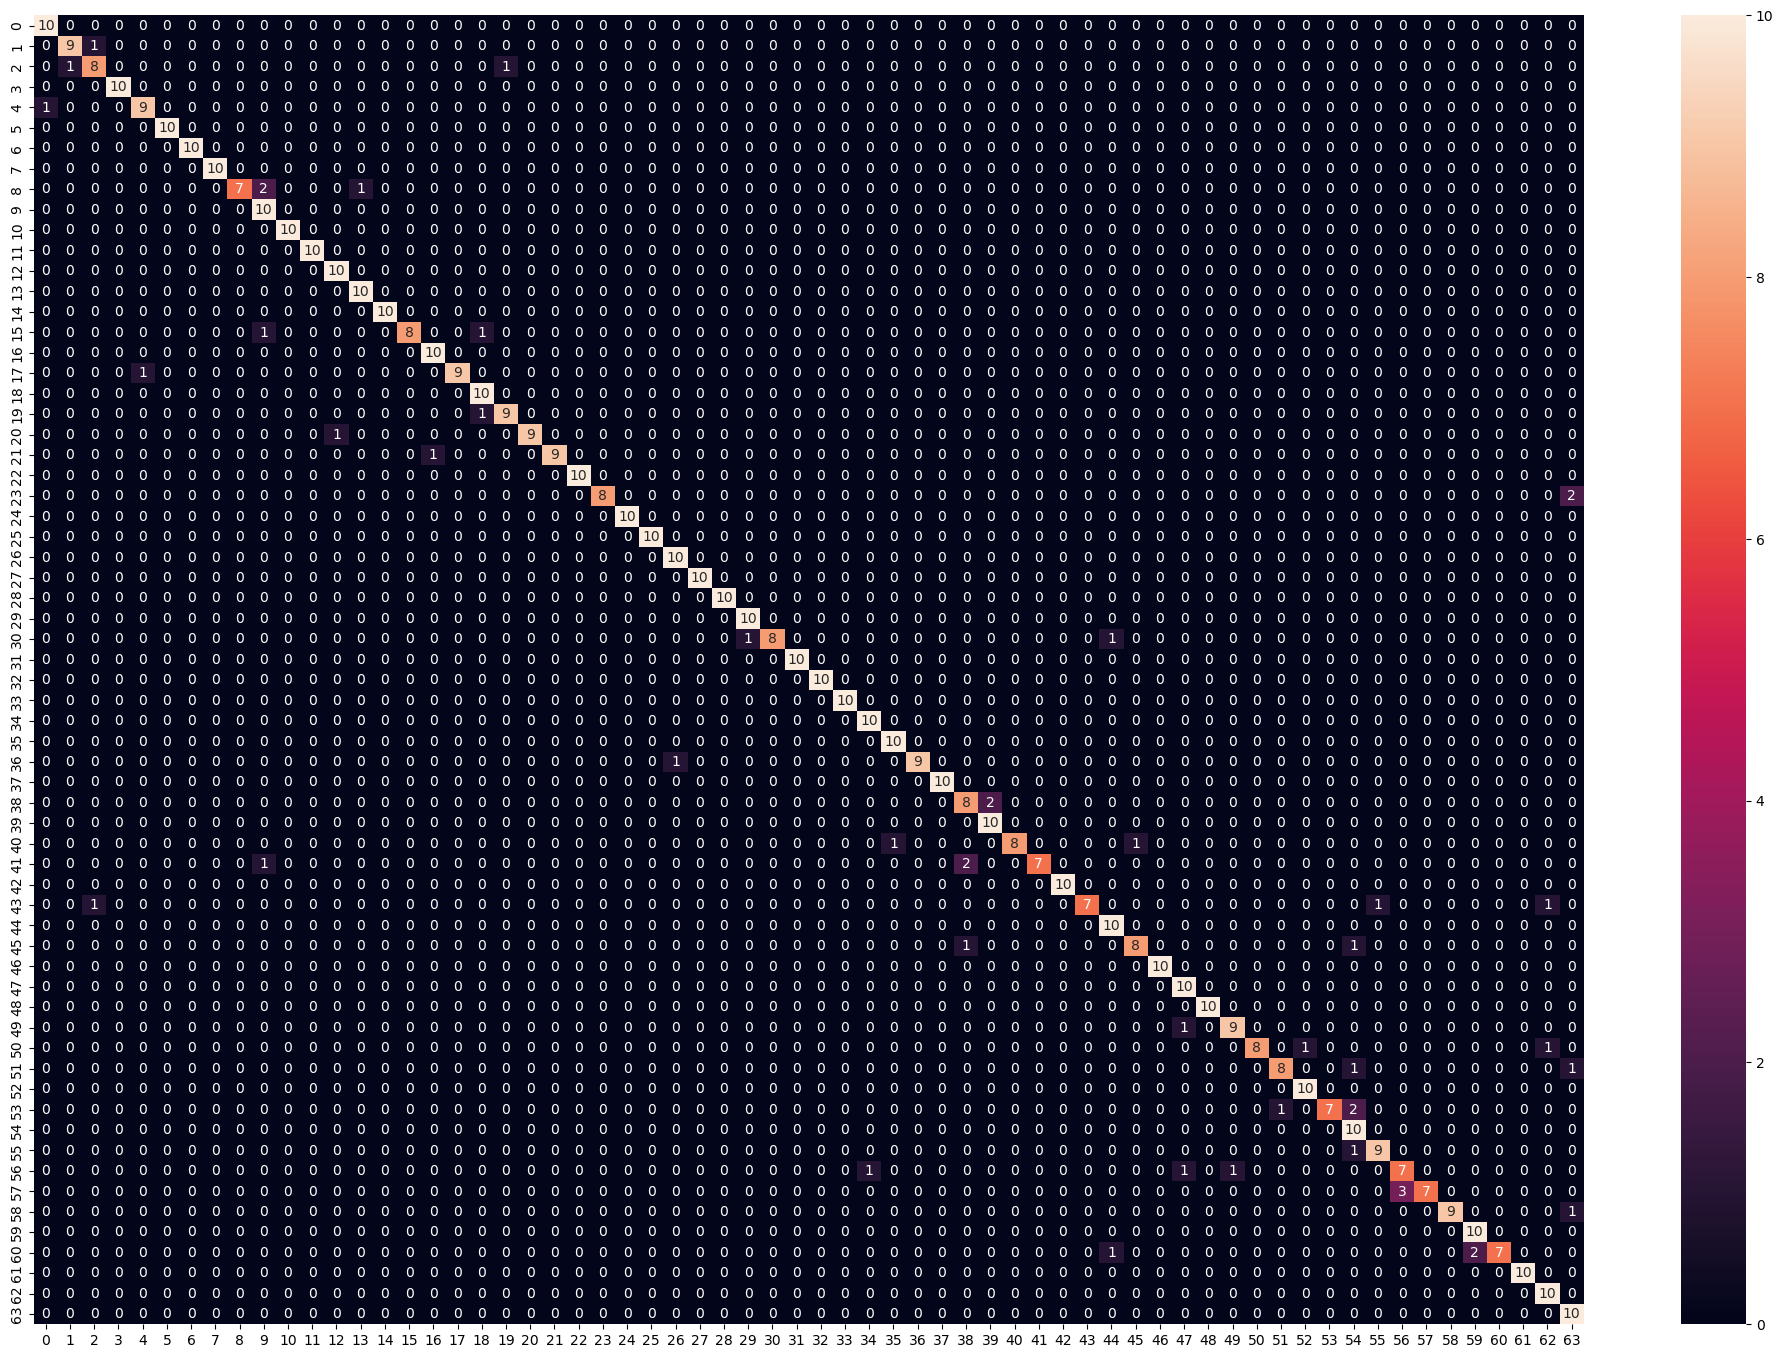

In [201]:
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction )
df_matrix = pd.DataFrame(result)
plt.figure(figsize = (25,17))
sn.heatmap(df_matrix,annot=True)

In [67]:
result.shape

(64, 64)

## Experiments with other data

In [39]:
vid_unprocessed = './prueba1.avi'
frames = groupFrames(vid_unprocessed)

Video url: ./prueba1.avi, video_length:148.0


In [40]:
frames.shape

(20, 480, 640, 1)

In [41]:
def resizeVid(video,width = WIDTH, height = HEIGHT):
    resizedVideo = []
    for img in video:
        #img = cv2.flip(img,1)
        img = cv2.resize(img,(width,height))
        img = np.expand_dims(img, axis=-1) 
        resizedVideo.append(img)
    return resizedVideo

In [42]:
frames = np.array([resizeVid(frames)])
frames.shape

(1, 20, 224, 224, 1)

In [43]:
frames[0].shape

(20, 224, 224, 1)

In [44]:
prediction = np.argmax(model.predict(frames))+1
prediction

1/1 [==============================] - 0s 275ms/step


19

In [26]:
y_test[0]

NameError: name 'y_test' is not defined

In [28]:
model.predict(frames)[0][prediction-1]

1/1 [==============================] - 0s 281ms/step


1.3397131e-08

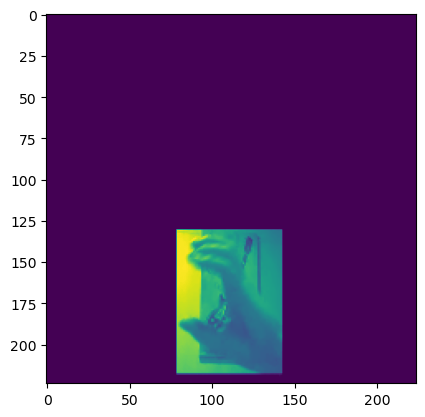

In [32]:
plt.imshow(frames[0][3])

In [25]:
src = cv2.VideoCapture(vid_unprocessed)  
ret, image = src.read()

In [26]:
#resizing the image
desired_width = 400  
aspect_ratio = image.shape[1] / image.shape[0]
desired_height = int(desired_width / aspect_ratio)
resized_image = cv2.resize(image, (desired_width, desired_height))

def onTrackbarChange(value):
    global blk_thresh
    blk_thresh = value
    print("Variable value:", blk_thresh)
    
def valueScaling(value):
    min_value = 0
    max_value = 100
    new_min = 0
    new_max = 255
    scaled_value = (value - min_value) * (new_max - new_min) / (max_value - min_value) + new_min
    return int(scaled_value)


blk_thresh = 50
scaled_thresh = valueScaling(blk_thresh)


window_name = 'Background Removed'
cv2.namedWindow(window_name)

cv2.createTrackbar('Variable', window_name, scaled_thresh, 100, onTrackbarChange)

while True:
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    _, threshold_img = cv2.threshold(blur, blk_thresh, 255, cv2.THRESH_BINARY)

    mask = 255 - threshold_img

    result = cv2.bitwise_and(resized_image, resized_image, mask=mask)

    cv2.imshow(window_name, result)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

KeyboardInterrupt: 